In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

In [9]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Cleaning the column name 

Changing the name of the column Life expectancy at birth (years) to LEABY for easier use

In [10]:
df = df.rename({'Life expectancy at birth (years)':'LEABY'}, axis = 'columns')

In [11]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Explore the data

In [12]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [13]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The data have 6 countries that are represented from 2000 - 2015

# Explotary Data

<Figure size 800x600 with 0 Axes>

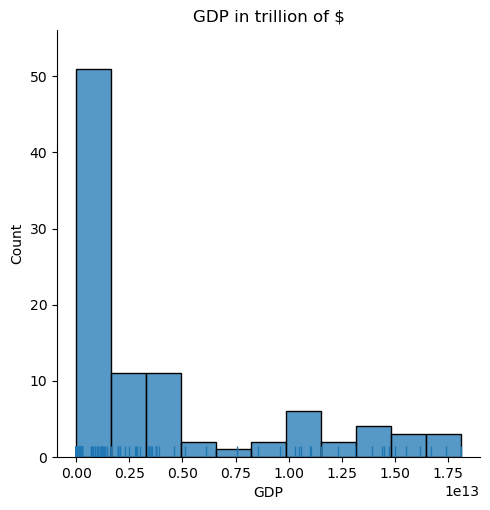

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(8, 6))
sns.displot(df.GDP, rug = True, kde=False)
plt.title('GDP in trillion of $')
plt.show()
plt.clf()

<Figure size 800x600 with 0 Axes>

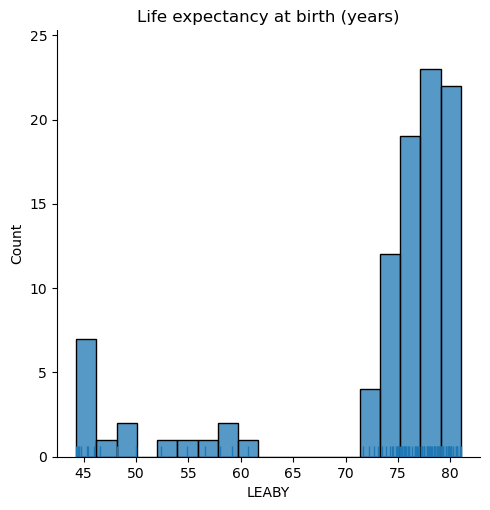

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(8, 6))
sns.displot(df.LEABY, rug = True, kde = False)
plt.title('Life expectancy at birth (years)')
plt.show()
plt.clf()

 From this 2 plots we can say that the destribuion of the GDP is very skewed to the right where most of its value are on let side. On the other hand the distribution of the LEABY is very skewed to the left where most of its value are on the right side. The GDP distribution is on the opposite side of the LEABY distribution 

The avg of GDP and LEABY by countries

In [27]:
df_avg = df.drop('Year', axis = 1).groupby('Country').mean().reset_index()
df_avg

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


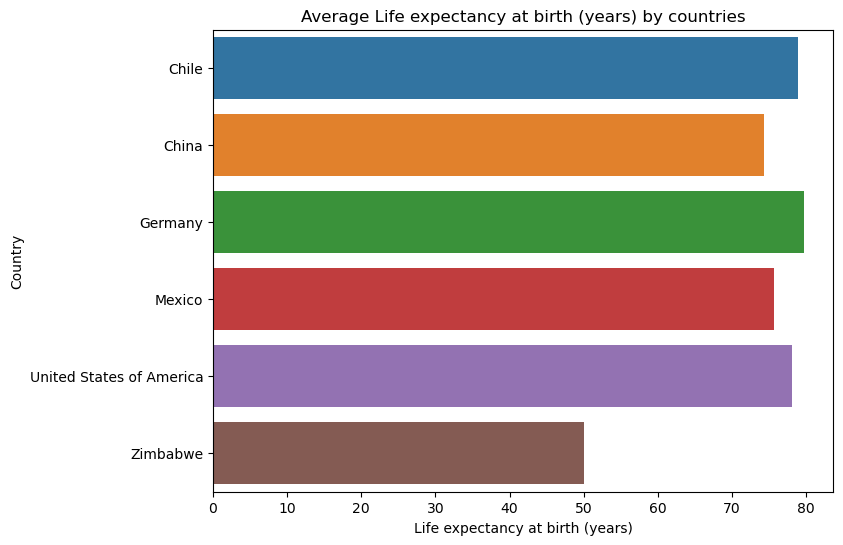

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x='LEABY', y='Country', data=df_avg)
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('Country')
plt.title('Average Life expectancy at birth (years) by countries')
plt.show()
plt.clf()

In this plot all the countries except Zimbabwe have their life expectency in the hight 70's.

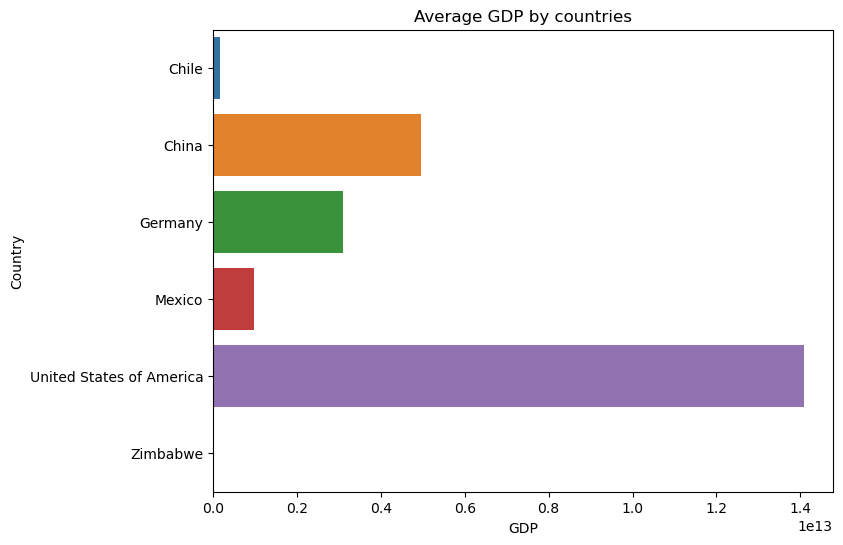

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x='GDP', y='Country', data=df_avg)
plt.xlabel('GDP')
plt.ylabel('Country')
plt.title('Average GDP by countries')
plt.show()
plt.clf()

In this plot avg GDP by countries, it seems that the US have the higher GDP compared to the other countries. Zimbabwe is non-existant and Chilie is barley visible. China, Germany and Mexico have relative close vlaues.

## Line Chart


Text(0, 0.5, 'GDP')

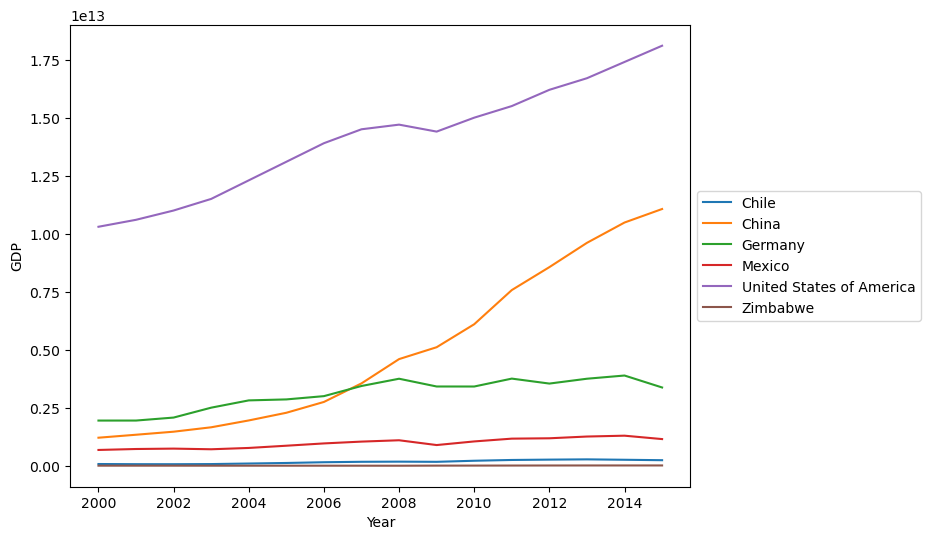

In [32]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left',  bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('GDP')

It is clear that between 2000 and 2015, the US and China had significant gains. In that time, China moved from having less than a quarter of a trillion dollars to having one trillion dollars. Increases of comparable magnitude were not observed in the other nations.

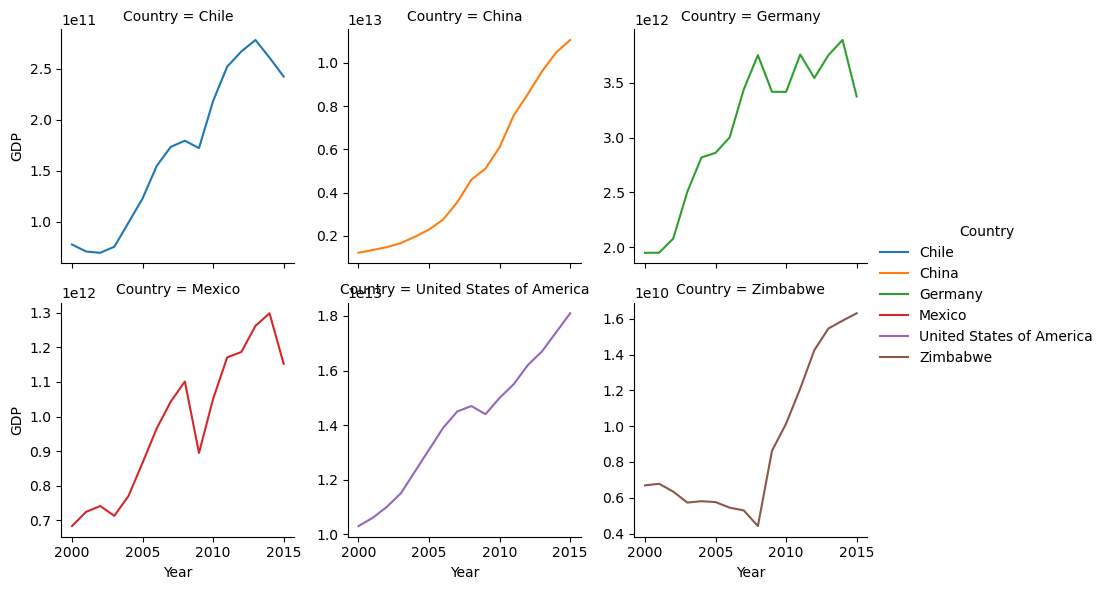

In [34]:
graphGDP =  sns.FacetGrid(df, col='Country', col_wrap=3, hue = 'Country', sharey = False)
graphGDP = (graphGDP.map(sns.lineplot, 'Year', 'GDP').add_legend().set_axis_labels('Year','GDP'))
graphGDP

The faceted line charts by Country were another element that was examined in further detail. Each country's y axis in the separate plots has its own, making it simpler to compare the evolution of each country's GDP without using the same scale. It is simpler to understand how all of the countries have seen growth using this technique. The GDP growth of the other nations seems moderate in the aforementioned chart when compared to China and the US, although all of the nations did experience growth after the year 2000.

Text(0, 0.5, 'Life expectancy at birth (years)')

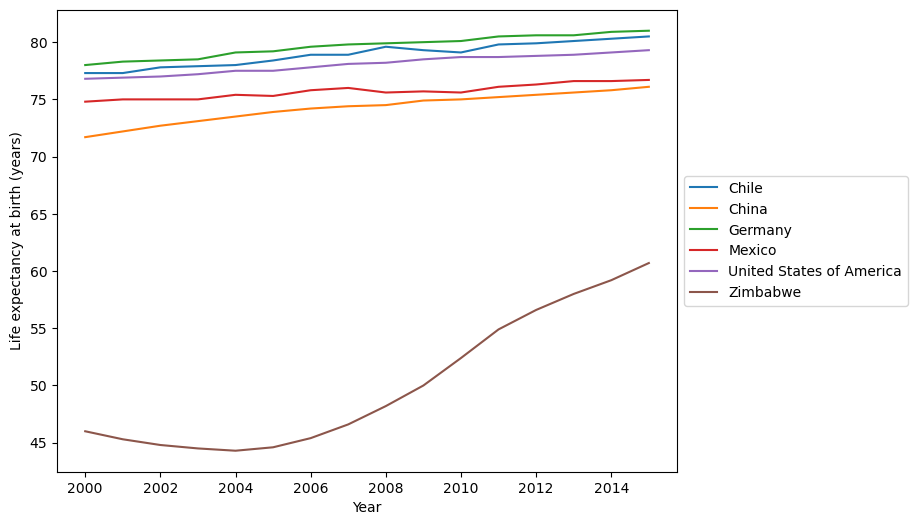

In [35]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Life expectancy at birth (years)')

The life expectancy over time is depicted in the chart above. The graph demonstrates that life expectancy has increased in every country, although Zimbabwe has experienced the most growth after a slight decline around 2004.


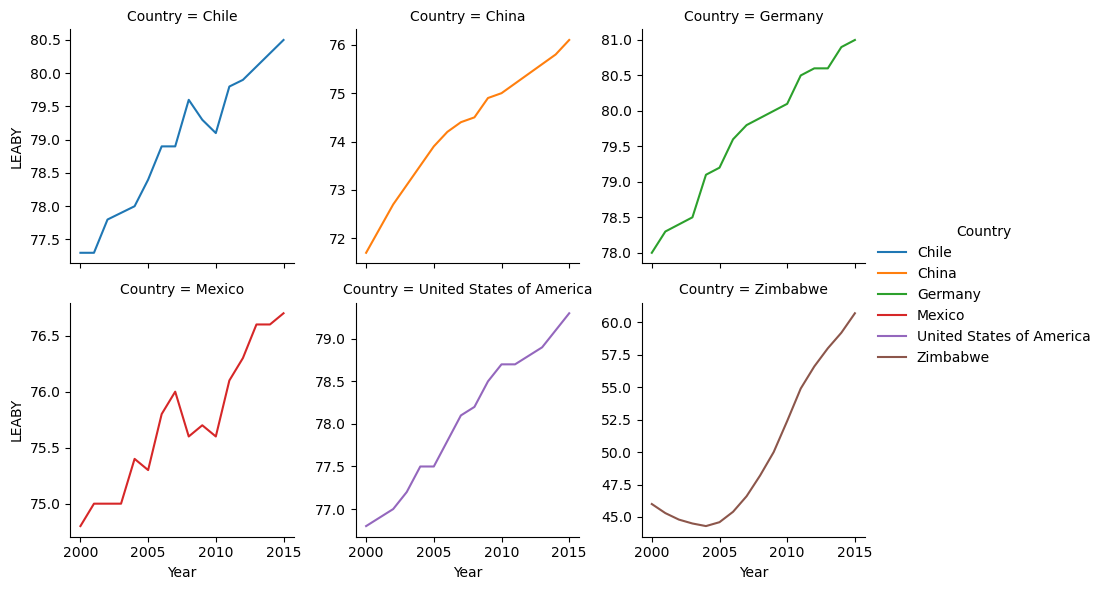

In [37]:
graphLEABY =  sns.FacetGrid(df, col='Country', col_wrap=3, hue = 'Country', sharey = False)
graphLEABY = (graphLEABY.map(sns.lineplot, 'Year', 'LEABY').add_legend().set_axis_labels('Year','LEABY'))
graphLEABY

The plot avbove shows life expectancy by country, much like the previous breakdown of GDP. It is clear that Chile and Mexico appeared to have drops in life expectancy at the same time, which merits more investigation. Since many of these subtleties were lost when the y-axis was shared among the nations, this form of plotting is helpful. Additionally, for some of the countries, the ostensibly linear improvements were not as smooth as they appeared to be.

# Conclusion


This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.